In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
from run_mcmc import *

In [4]:
%matplotlib inline

In [2]:
# read 
pk_mol = read_molino_pk()
pk_glm = read_glam_pk()
pk_glm_nobao = read_glam_pk_nobao()

bk_mol = read_molino_bk()
bk_glm = read_glam_bk()
bk_glm_nobao = read_glam_bk_nobao()

## MCMC

For this part, do `python run_mcmc.py`

In [13]:
data = np.loadtxt('sigmas_mcmc_isbk_False.txt')
data.shape

(26, 2)

In [14]:
data

array([[0.05      , 0.13441421],
       [0.06      , 0.12832904],
       [0.07      , 0.12308665],
       [0.08      , 0.10595109],
       [0.09      , 0.08797358],
       [0.1       , 0.06803653],
       [0.11      , 0.05385949],
       [0.12      , 0.04184035],
       [0.13      , 0.03683019],
       [0.14      , 0.0327538 ],
       [0.15      , 0.027653  ],
       [0.16      , 0.02574306],
       [0.17      , 0.02451377],
       [0.18      , 0.02303401],
       [0.19      , 0.02237078],
       [0.2       , 0.02176475],
       [0.21      , 0.02111911],
       [0.22      , 0.02033171],
       [0.23      , 0.02049979],
       [0.24      , 0.02039472],
       [0.25      , 0.0201697 ],
       [0.26      , 0.02004028],
       [0.27      , 0.01970418],
       [0.28      , 0.084115  ],
       [0.29      , 0.09037396],
       [0.3       , 0.09780598]])

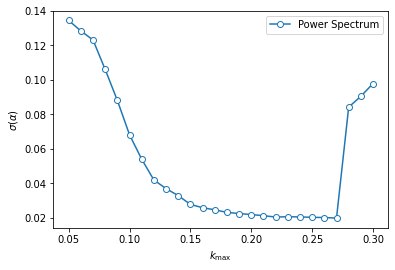

In [22]:
plt.plot(data[:, 0], data[:, 1], 'C0o-', mfc='w', label='Power Spectrum')
# plt.plot(data[:, 0], data[:, 2], 'C0--')
# plt.plot(data[:, 0], data[:, 3], 'C1-')
# plt.plot(data[:, 0], data[:, 4], 'C1--')
# plt.yscale('log')
plt.xlabel(r'$k_{\rm max}$')
plt.ylabel(r'$\sigma (\alpha)$')
plt.legend()

## 1D search

In [3]:
kmin = 0.0345
kmax = np.arange(0.05, 0.31, 0.05)

# power spectra
bao_pk = BAO(pk_glm['k'], pk_glm['pk']/pk_glm_nobao['pk'].mean(axis=0))
bao_pk_red = BAO(pk_glm['k'], pk_glm['pk']/pk_glm_nobao['pk'].mean(axis=0))
# bispectra
bao_bk = BAO(bk_glm['k'], bk_glm['pk']/bk_glm_nobao['pk'].mean(axis=0), is_bk=True)
bao_bk_red = BAO(bk_glm['k'], bk_glm['pk']/bk_glm_nobao['pk'].mean(axis=0), is_bk=True)



sigmas = []
sigmas3 = []
sigmas2 = []
sigmas4 = []

for kmax_ in kmax:
    sigmas.append(sigma_finder(bao_pk, kmin, kmax_))
    sigmas3.append(sigma_finder(bao_pk_red, kmin, kmax_, pk_mol=pk_mol))
    sigmas2.append(sigma_finder(bao_bk, kmin, kmax_))
    sigmas4.append(sigma_finder(bao_bk_red, kmin, kmax_, pk_mol=bk_mol))

    
sigmas = np.array(sigmas)
sigmas3 = np.array(sigmas3)
sigmas2 = np.array(sigmas2)
sigmas4 = np.array(sigmas4)

(1097, 30)
(1097, 30)
(1097, 2600)
(1097, 2600)


In [8]:
bao_bk_red = BAO(bk_glm['k'], bk_glm['pk']/bk_glm_nobao['pk'].mean(axis=0), is_bk=True)

(1097, 2600)


In [15]:
bao_bk_red.prep_k(0.0345, 0.25)
bao_bk_red.prep_cov(pk_mol=bk_mol)

In [16]:
x = np.linspace(0.8, 1.2)
y = []
for x_ in x:
    y.append(bao_bk_red(x_))

In [17]:
y

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.9008106046595806,
 0.1072954419362534,
 1.4608538353995097,
 3.645758118167116,
 6.404897215111109,
 9.737259449584531,
 13.240403370941543,
 16.612430972626775,
 20.282624727035582,
 23.764051342814092,
 27.580606957578745,
 31.23874017074631,
 34.93428308282339,
 38.57985103774817,
 42.02397719196573,
 44.82508929772856,
 47.837077433290986,
 50.51095136867315,
 52.75281291907097,
 54.480082436072024,
 nan,
 nan,
 nan,
 nan,
 nan]

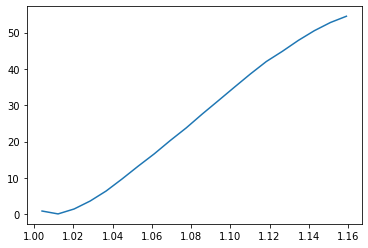

In [18]:
plt.plot(x, y)

In [5]:
%matplotlib inline

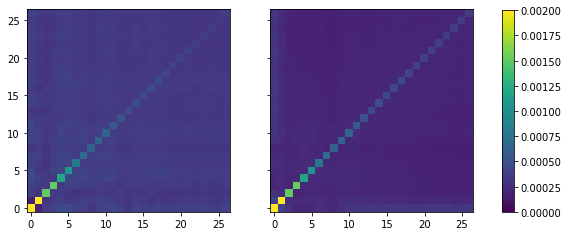

In [6]:
fg, ax = plt.subplots(ncols=2, figsize=(8, 4), sharey=True)

ax[0].imshow(bao_pk.cov, vmin=0., vmax=2.0e-3, origin='lower')
map_ = ax[1].imshow(bao_pk_red.cov, vmin=0., vmax=2.0e-3, origin='lower')

cax_ = fg.add_axes([0.95, 0.15, 0.02, 0.7])
fg.colorbar(map_, cax=cax_)

Text(0, 0.5, '$\\sigma (\\alpha)$')

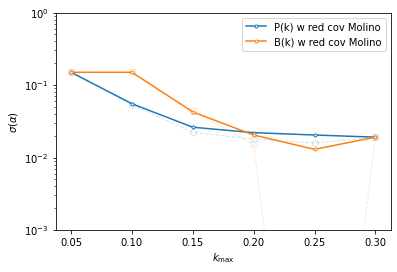

In [7]:
plt.semilogy(kmax, sigmas, 'C0o--', mfc='w', lw=1, alpha=0.2)
plt.semilogy(kmax, sigmas3, 'C0.-', mfc='w', label='P(k) w red cov Molino')

plt.semilogy(kmax, sigmas2, 'C1s--', mfc='w', lw=1, alpha=0.2)
plt.semilogy(kmax, sigmas4, 'C1.-', mfc='w', label='B(k) w red cov Molino')

plt.legend()
plt.ylim(1.0e-3, 1.0e0)
plt.xlabel(r'$k_{\rm max}$')
plt.ylabel(r'$\sigma (\alpha)$')